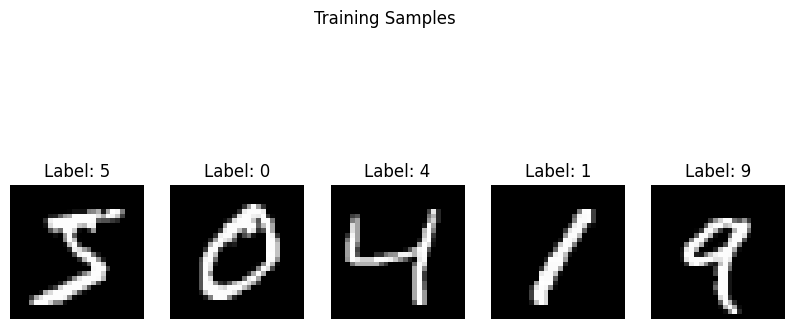

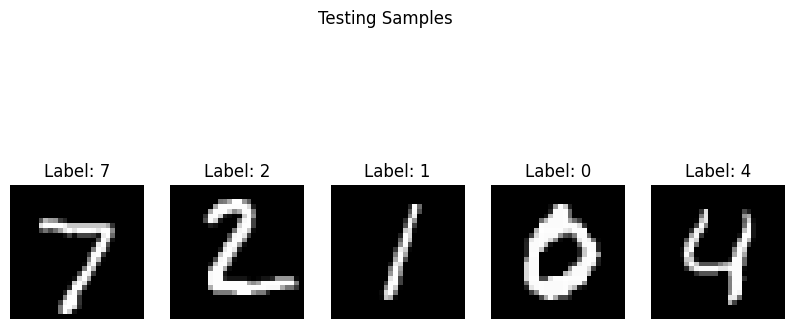

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a function to plot samples with labels
def plot_samples(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {class_names[labels[i]]}")
        plt.axis('off')

# Define class names for MNIST (digits 0-9)
class_names = [str(i) for i in range(10)]

# Plot a few training samples
plot_samples(train_images, train_labels, class_names, num_samples=5)
plt.suptitle('Training Samples')
plt.show()

# Plot a few testing samples
plot_samples(test_images, test_labels, class_names, num_samples=5)
plt.suptitle('Testing Samples')
plt.show()


In [2]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Custom initializer for constant value

# Define the Sequential model
model = keras.Sequential([
    # Flatten the 28x28 input images to a 1D array (784 elements)
    layers.Flatten(input_shape=(28, 28)),

    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),
     # Add a dense (fully connected) layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Add another dense layer with 10 units (one for each digit) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate=0.0005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.0)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=15, validation_split=0.5, batch_size=1024,verbose=2)

Epoch 1/15


30/30 - 1s - loss: 1.5936 - accuracy: 0.5935 - val_loss: 0.9209 - val_accuracy: 0.7943 - 1s/epoch - 43ms/step
Epoch 2/15
30/30 - 0s - loss: 0.6342 - accuracy: 0.8433 - val_loss: 0.4577 - val_accuracy: 0.8790 - 161ms/epoch - 5ms/step
Epoch 3/15
30/30 - 0s - loss: 0.3926 - accuracy: 0.8936 - val_loss: 0.3523 - val_accuracy: 0.9028 - 158ms/epoch - 5ms/step
Epoch 4/15
30/30 - 0s - loss: 0.3194 - accuracy: 0.9131 - val_loss: 0.3045 - val_accuracy: 0.9149 - 160ms/epoch - 5ms/step
Epoch 5/15
30/30 - 0s - loss: 0.2776 - accuracy: 0.9240 - val_loss: 0.2743 - val_accuracy: 0.9228 - 160ms/epoch - 5ms/step
Epoch 6/15
30/30 - 0s - loss: 0.2499 - accuracy: 0.9308 - val_loss: 0.2549 - val_accuracy: 0.9268 - 158ms/epoch - 5ms/step
Epoch 7/15
30/30 - 0s - loss: 0.2268 - accuracy: 0.9370 - val_loss: 0.2393 - val_accuracy: 0.9314 - 166ms/epoch - 6ms/step
Epoch 8/15
30/30 - 0s - loss: 0.2086 - accuracy: 0.9411 - val_loss: 0.2219 - val_accuracy: 0.9365 - 158ms/epoch - 5ms/step
Epoch 9/15
30/30

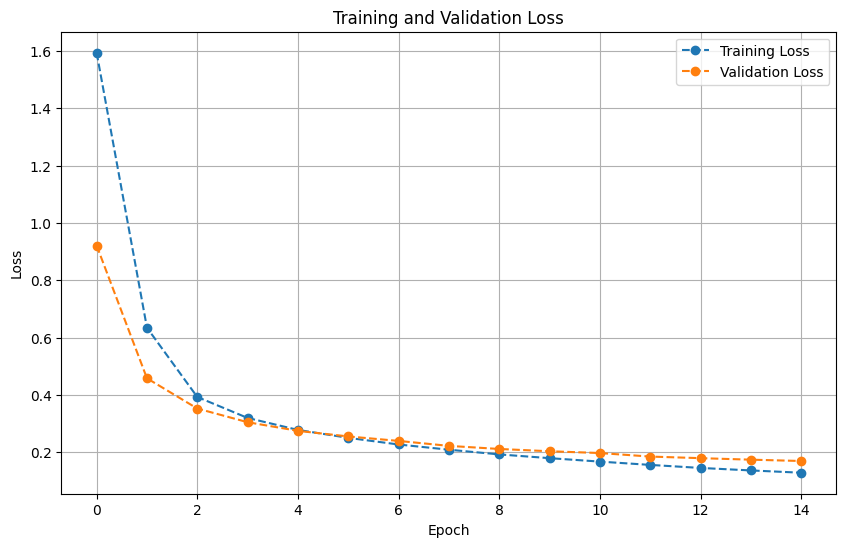

In [4]:
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 0s 757us/step - loss: 0.1531 - accuracy: 0.9541
Test Loss: 0.15309958159923553
Test Accuracy: 0.9541000127792358


In [6]:
import matplotlib.pyplot as plt

# Loop through each layer in the model
for layer_index, layer in enumerate(model.layers):
    # Get the weights of the layer
    weights = layer.get_weights()

    # Check if the layer has weights
    if weights:
        # Print the shape of the weights
        print(f'Layer {layer_index} ({layer.name}) weights shape: {weights[0].shape}')


    else:
        print(f'Layer {layer_index} ({layer.name}) has no weights.')

Layer 0 (flatten) has no weights.
Layer 1 (dense) weights shape: (784, 128)
Layer 2 (dense_1) weights shape: (128, 64)
Layer 3 (dense_2) weights shape: (64, 10)


In [7]:
#Only input and output layer# Define the Sequential model
model = keras.Sequential([
    # Flatten the 28x28 input images to a 1D array (784 elements)
    layers.Flatten(input_shape=(28, 28)),



    # Add another dense layer with 10 units (one for each digit) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate=0.0005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1500/1500 - 2s - loss: 1.7513 - accuracy: 0.5292 - val_loss: 1.3383 - val_accuracy: 0.7424 - 2s/epoch - 1ms/step
Epoch 2/50
1500/1500 - 1s - loss: 1.1681 - accuracy: 0.7647 - val_loss: 0.9847 - val_accuracy: 0.8146 - 1s/epoch - 747us/step
Epoch 3/50
1500/1500 - 1s - loss: 0.9286 - accuracy: 0.8078 - val_loss: 0.8161 - val_accuracy: 0.8381 - 1s/epoch - 747us/step
Epoch 4/50
1500/1500 - 1s - loss: 0.8022

C:\Users\Tuf\AppData\Local\Temp\ipykernel_17212\1796584108.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


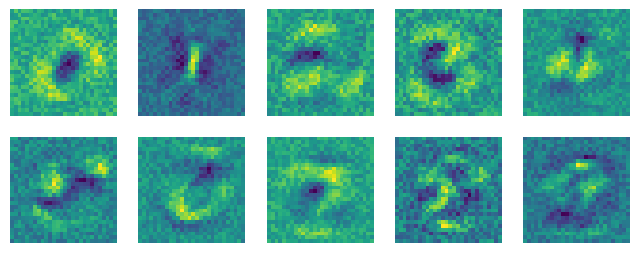

In [8]:
import matplotlib.pyplot as plt

# Get the weights of a specific layer (e.g., the first dense layer)
layer_index = 1
weights = model.layers[layer_index].get_weights()[0]

# Reshape the weights to match the expected input shape (e.g., for a dense layer)
if len(weights.shape) == 2:
    weights = weights.reshape((28, 28, -1))

# Plot the weights as an image
plt.figure(figsize=(8, 8))
plt.title(f"Weights of Layer {layer_index}")
for i in range(weights.shape[-1]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(weights[:, :, i], cmap='viridis')
    plt.axis('off')

plt.show()